https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd
import numpy as np

features = pd.read_csv('./data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
# de Fahrenheit a Celsius y cambiar las unidades de 'actual'
def conversor(x):
   return (x-32)*(5/9)

features['actual'] = features['actual'].apply(conversor)

In [4]:
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,7.222222,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,6.666667,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,5.000000,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,4.444444,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,6.666667,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    float64
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 32.8+ KB


In [7]:
features = pd.get_dummies(features)

In [8]:
features.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,7.222222,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,6.666667,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,5.000000,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,4.444444,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,6.666667,46,46,46,41,0,0,0,0,0,1,0


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    float64
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

### 3. Divide en train y test

In [10]:
labels = np.array(features['actual'])

features = features.drop('actual', axis=1)

feature_list = list(features.columns)

features = np.array(features)

In [12]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                           labels,
                                                                           test_size=0.25,
                                                                           random_state=42)

In [13]:

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=5)

### 5. Calcula su MAE
Sin usar sklearn

In [16]:
predictions = dtr.predict(train_features)

errors = abs(predictions - train_labels)

print("MAE Train: ", round(np.mean(errors), 2), " degrees")

MAE Train:  1.47  degrees


In [17]:
predictions = dtr.predict(test_features)

errors = abs(predictions - test_labels)

print("MAE Test: ", round(np.mean(errors), 2), " degrees")

MAE Test:  2.45  degrees


### 6. Calcula su MAPE
Sin usar sklearn

In [18]:
mape = 100 * (errors/test_labels)

print("MAPE Test: ", round(np.mean(mape), 2), '%')

MAPE Test:  15.78 %


### 7. Representa el árbol de decision

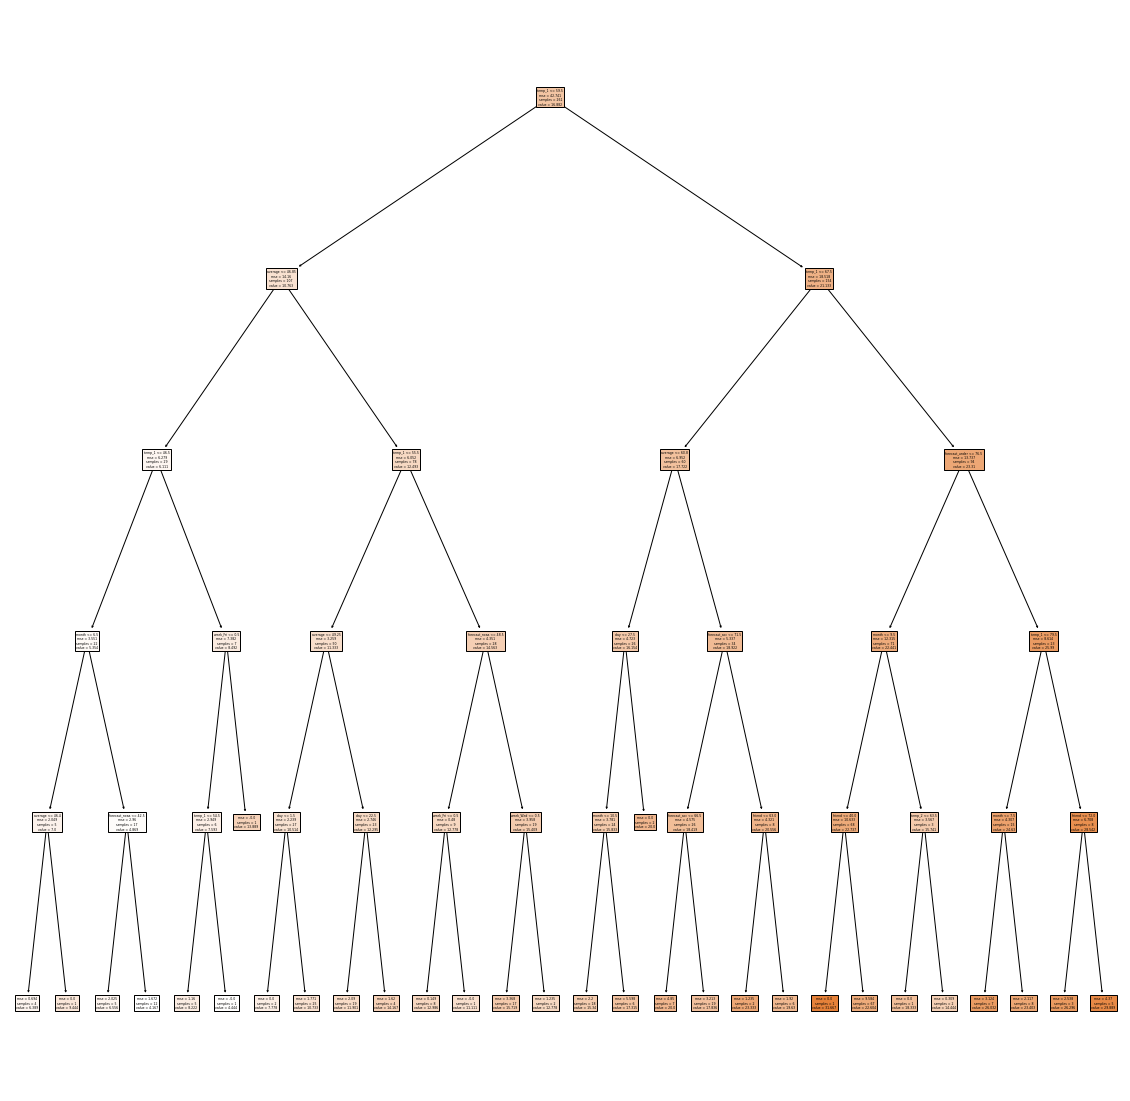

In [20]:
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(dtr,
                      feature_names=feature_list,
                      class_names = "actual",
                      filled=True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [21]:
dtr = DecisionTreeRegressor(max_depth = 3)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular su MAE

In [22]:
predictions = dtr.predict(train_features)

errors = abs(predictions - train_labels)

print("MAE Train: ", round(np.mean(errors), 2), " degrees")
# 1.47

MAE Train:  2.04  degrees


In [23]:
predictions = dtr.predict(test_features)

errors = abs(predictions - test_labels)

print("MAE Test: ", round(np.mean(errors), 2), " degrees")
# 2.45

MAE Test:  2.39  degrees


### 10. Vuelve a representar su árbol

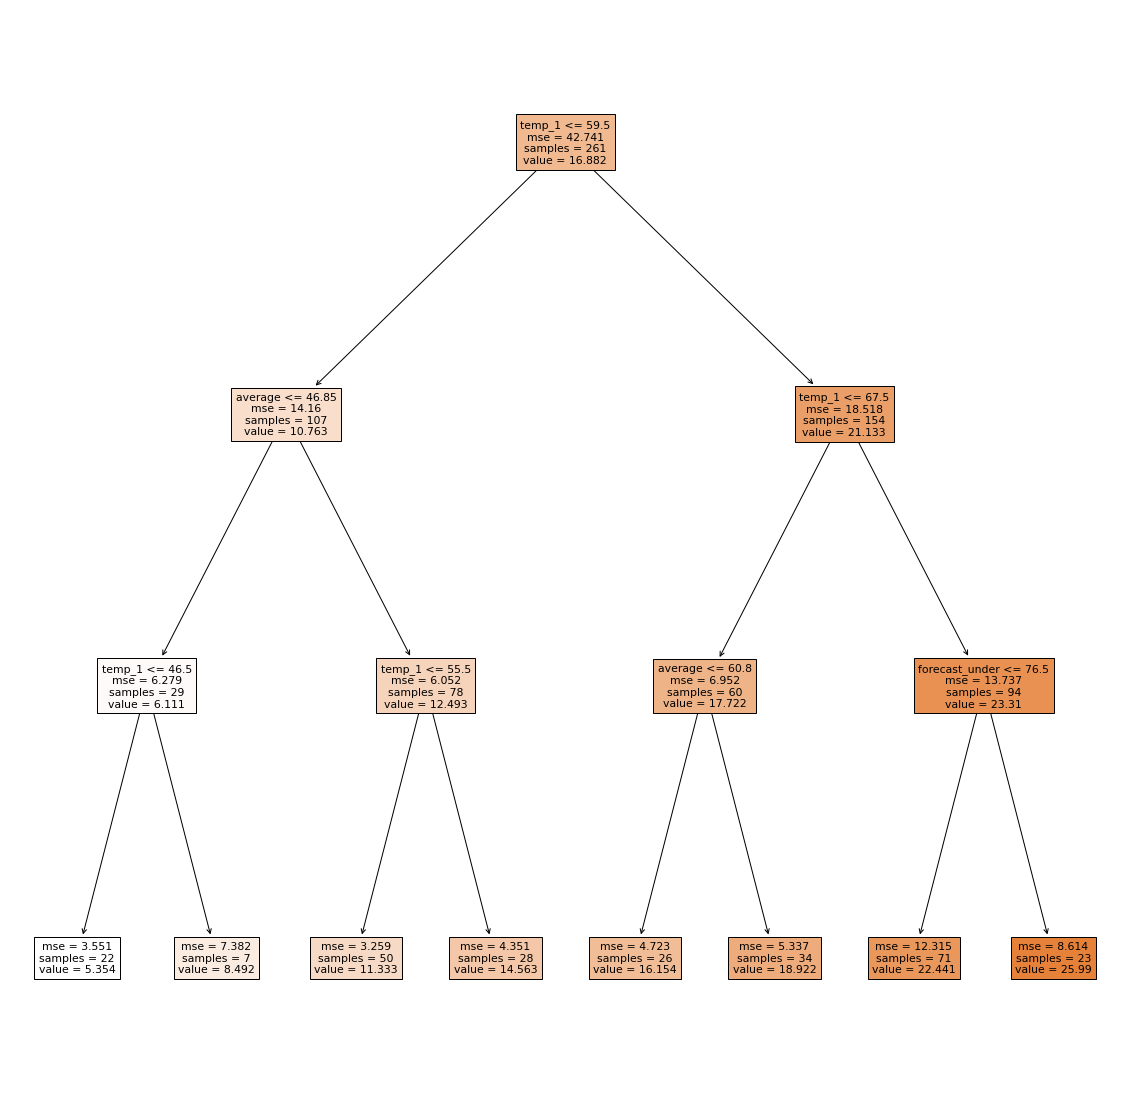

In [24]:
plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(dtr,
                      feature_names=feature_list,
                      class_names = "actual",
                      filled=True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [26]:
np.sum(dtr.feature_importances_)

0.9999999999999999

In [25]:
import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.103995
8,forecast_under,0.023367
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000
